# Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Inserting Libaries

In [1]:
# Importing Libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

In [2]:
# File Reading
Reading_df = pd.read_csv('day.csv')

In [3]:
# Shape of Data
Reading_df.shape

(730, 16)

In [4]:
# First 5 columns
Reading_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Last 5 columns
Reading_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# Checking Dtypes
Reading_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Numerical Deatils
Reading_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check the dimensions of data
Reading_df.ndim

2

## Step 3: Cleaning Data

### 3.1 Handling Outliners

In [9]:
## Checking NUll values
Cleaning_df = Reading_df.copy()
Cleaning_df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

>> No Null Values in Dataset

### 3.2 Renaming Few columns

In [10]:
# renaming some columns to improve clarity
Cleaning_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
Cleaning_df.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### 3.3 Dropping Columns 

In [11]:
## We have a cnt column that is the total of the two that is the target column.
Cleaning_df.drop(['casual','registered'],axis=1,inplace=True)

### Dropping Dteday as we already have month and weekday columns 
Cleaning_df.drop(['dteday'], axis = 1, inplace = True)

## Instant donot have any revlance with target column and instant is just a row instance identifier.
Cleaning_df.drop(['instant'], axis = 1, inplace = True)

In [12]:
## Checking shape of dateset after removal of columns
Cleaning_df.shape

(730, 12)

### 3.4) Handling Outliers

In [13]:
## Checking Unqiue Values of Columns
Cleaning_df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

> Temp, Atemp, humidity, Windespeed are contnous series 

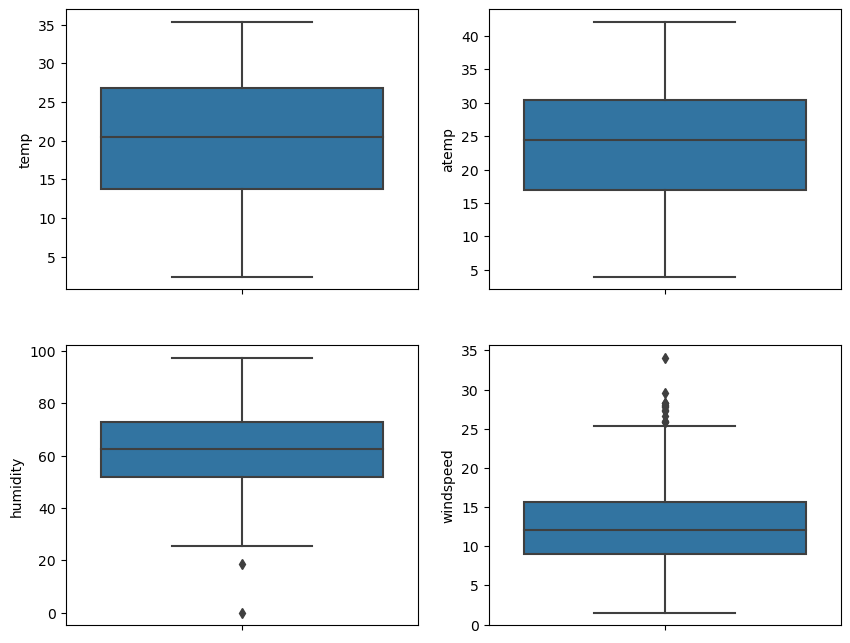

In [14]:
## Boxplot for continous Series
data = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(10,8))

x = 1
for a in data:
    plt.subplot(2,2,x)
    sns.boxplot(y=a, data=Cleaning_df)
    x+=1

> We observe from the graphs that there are no outliers to deal with. We are satisfied that there are no outliers in the data set.

### 3.5) DataTypes Conversion

In [15]:
# Converting Dtypes into Category

Cleaning_df['season']=Cleaning_df['season'].astype('category')
Cleaning_df['weathersit']=Cleaning_df['weathersit'].astype('category')
Cleaning_df['month']=Cleaning_df['month'].astype('category')
Cleaning_df['weekday']=Cleaning_df['weekday'].astype('category')

In [16]:
# Checking Data after encoding
Cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## Step 4)Exploratory data analysis (EDA)

### 4.1) Correlation

In [17]:
## Checking Correlation between variables
Eda_df= Cleaning_df.copy()
Eda_df.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


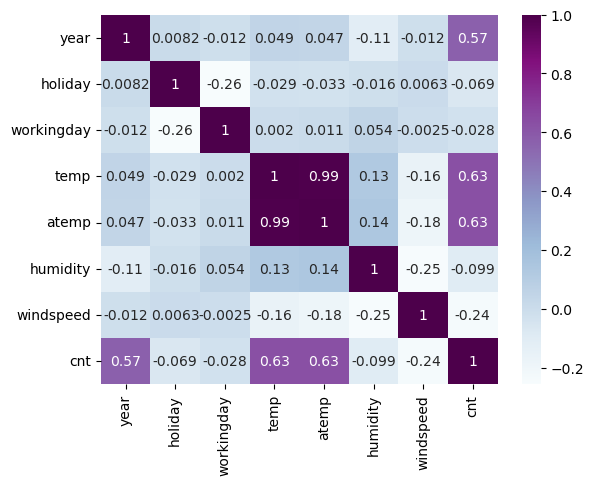

In [18]:
# Heatmap of correlation
heatmap=Eda_df.corr()
sns.heatmap(heatmap, cmap="BuPu", annot = True)
plt.show()

> Temp and atemp have 0.99 correlation which means they are highly correlated with each others therefore it also good like atemp is dervied from temp so we will drop it for better analysis. 

### 4.2) Linear Relationship 

<Figure size 1900x1600 with 0 Axes>

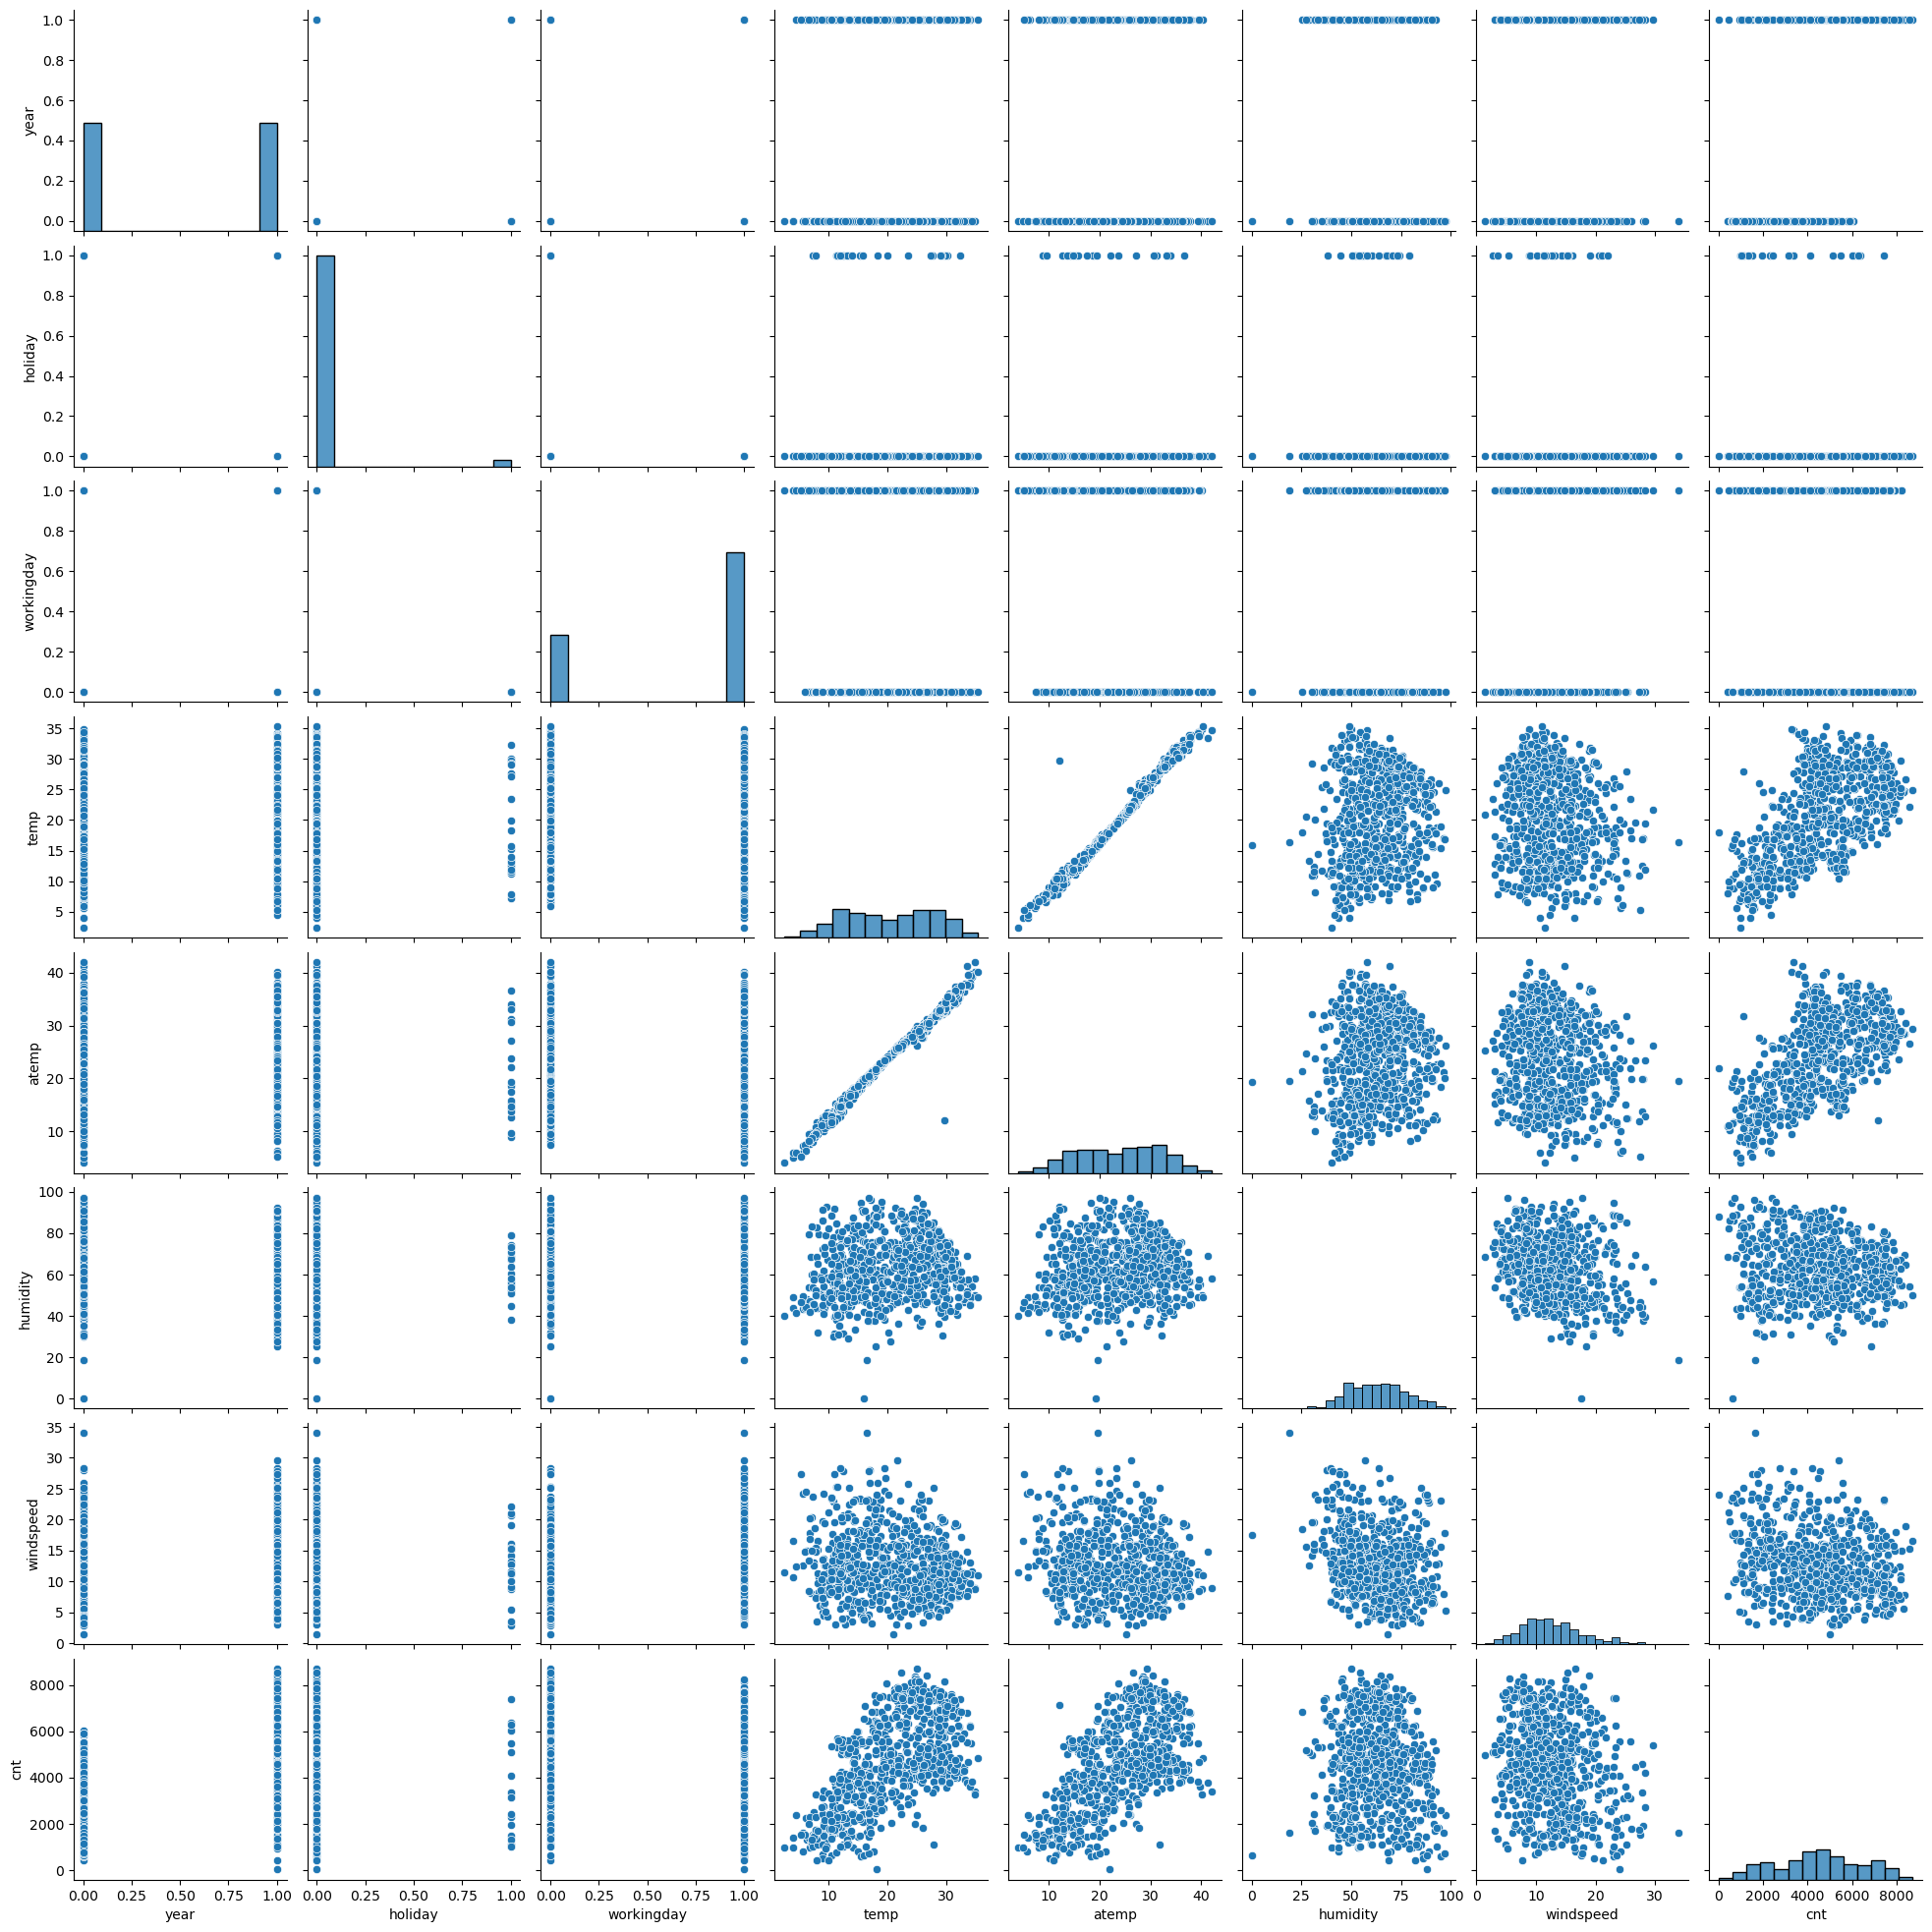

In [19]:
## Pairplot 
plt.figure(figsize=(19,16))
sns.pairplot(Eda_df)
plt.show()

<Figure size 2000x2900 with 0 Axes>

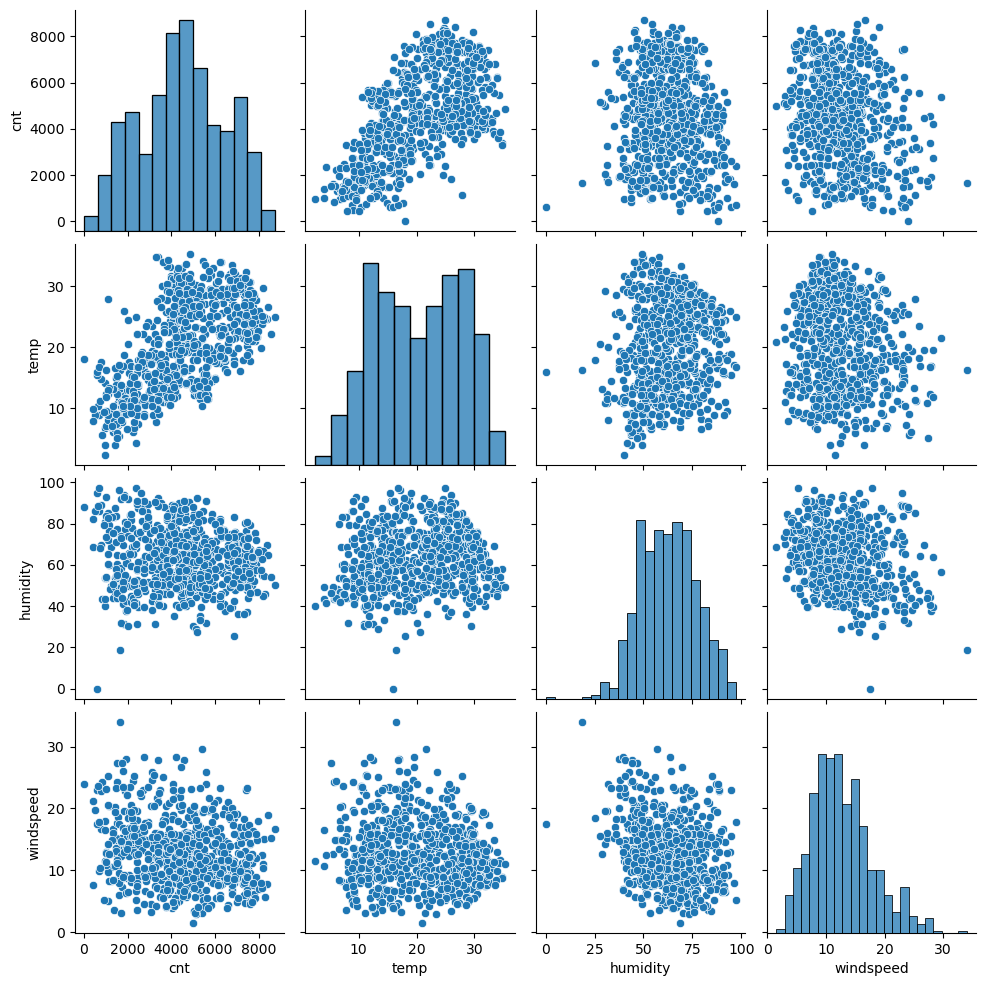

In [20]:
## Pairplot for only Continous numerical Columns
plt.figure(figsize = (20,29))
sns.pairplot(data=Eda_df,vars=['cnt', 'temp', 'humidity','windspeed'])
plt.show()

In [21]:
def Bar_func(x):
    plt.figure(figsize=(5,5))
    sns.regplot(data=Eda_df,y="cnt",x= x)
    plt.show()

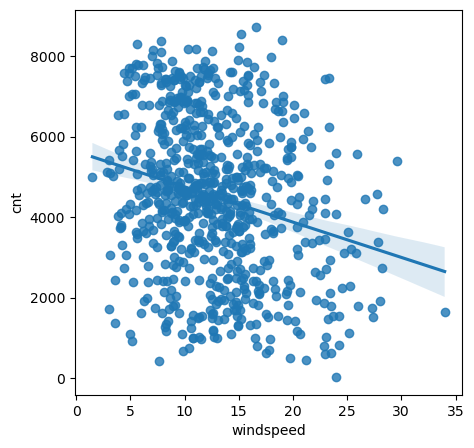

In [22]:
## Regplot for windspeed
Bar_func("windspeed")

> Values are scattered however demand of bikes have inreversely realition wih windspeed. (Demand low when windspeed is high)

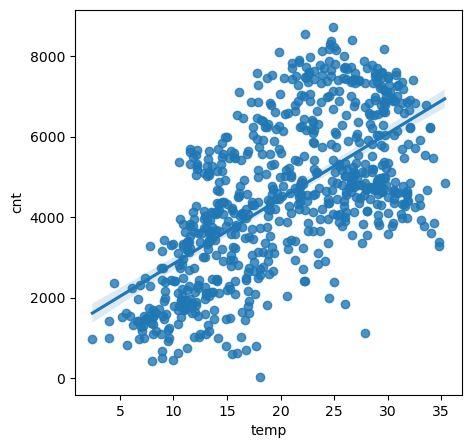

In [23]:
## Regaplot for Temp
Bar_func('temp')

> Temp has postive relation with demand of bikes

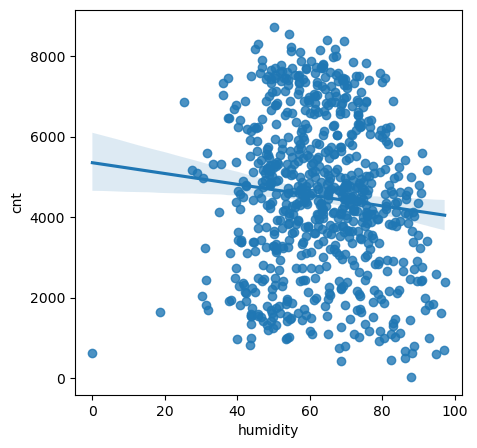

In [24]:
## Regplot for Humidity
Bar_func('humidity')

> Humidity increases then demand gets lowers 

#### Overall Inference: Target Variable (CNT) have good linear relation with few independent variables

### 4.3 ) Visualisation of Categorical Variable with Target

In [25]:
# Creating function of barplot to check categotical values

def Bar_func(x):
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.barplot(x,'cnt',data=Eda_df,hue='year',palette='Set3')
    plt.legend(labels=['2018', '2019'])
    plt.subplot(1,2,2)
    sns.barplot(x,'cnt',data=Eda_df,palette='Set2')
    plt.show()

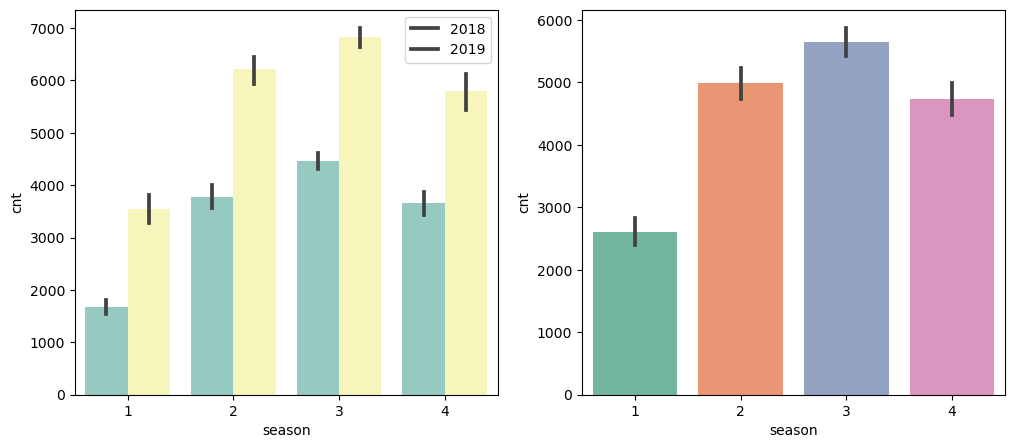

In [26]:
# Visualation of season
Bar_func('season')

> Spring season attract lowest booking whereas Fall attracted maximun`

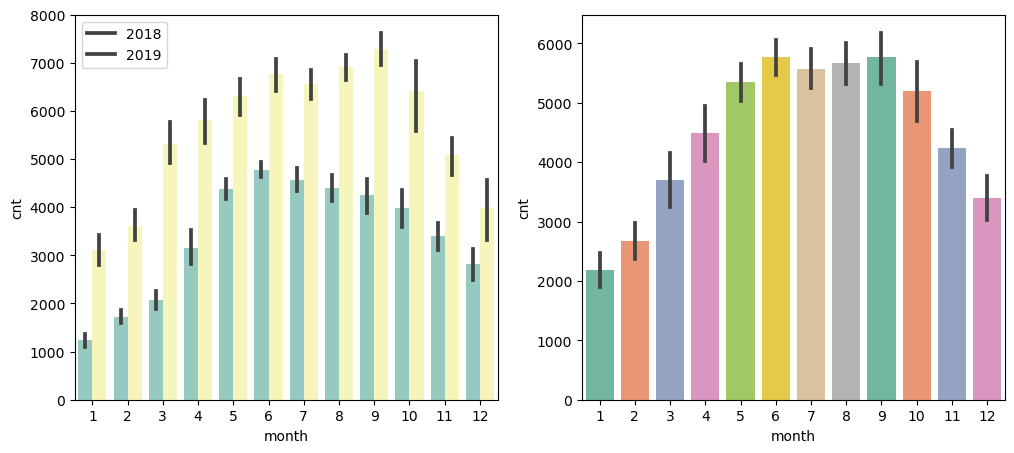

In [27]:
# Visualation of month
Bar_func('month')

> Jan has lowest booking rate as compared tpo other months anf however massive sales had been increased from 2018 in 2019

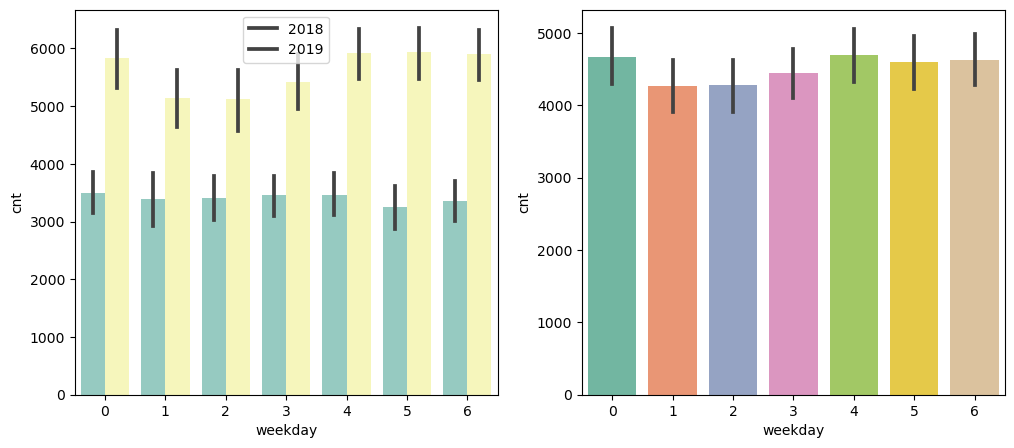

In [28]:
# Visualation of weekday
Bar_func('weekday')

> Booking have imporoved in 2019 as compared to 2018
>>Thursday has maximum booking day but marginally better than other days

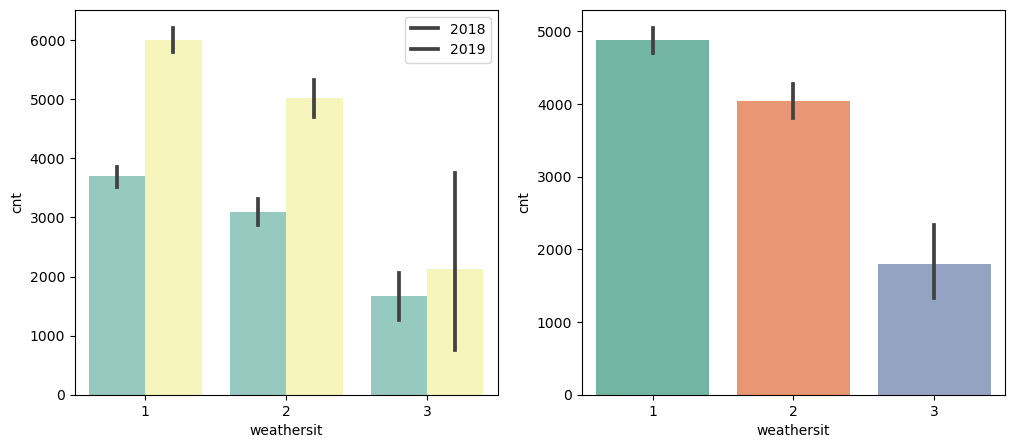

In [29]:
# Visualation of weathersit
Bar_func('weathersit')

> Good weather had attract more booking in both years

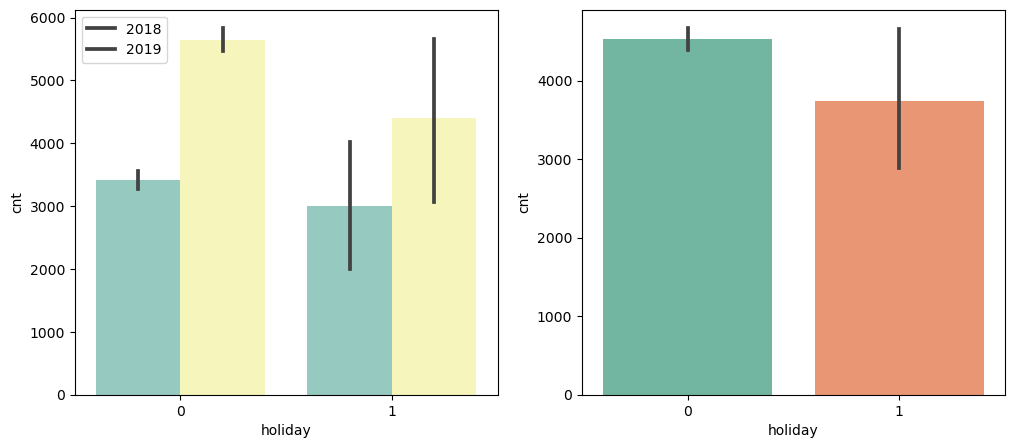

In [30]:
# Visualation of holiday
Bar_func('holiday')

> Booking on holiday are more as compared on non-holiday days

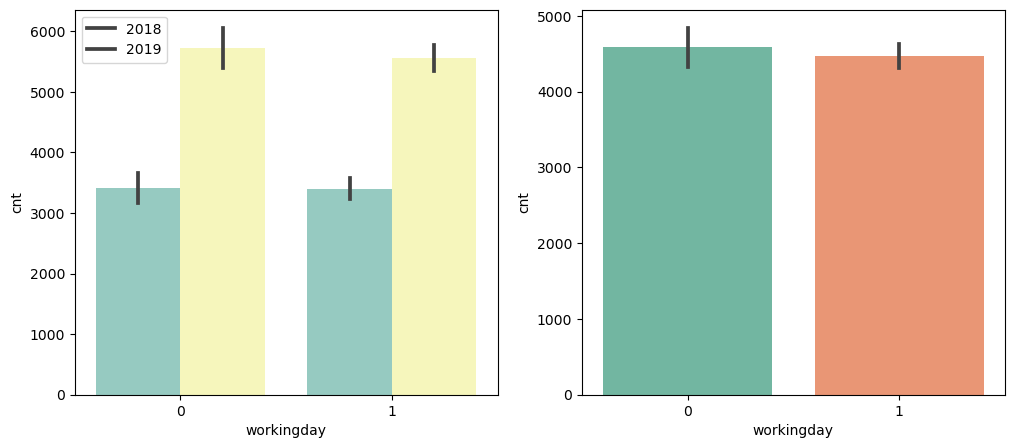

In [31]:
# Visualation of workingday
Bar_func('workingday')

> Total booking has been increased in 2019 from 2018 however there is margionally difference between between wroking day or non working days

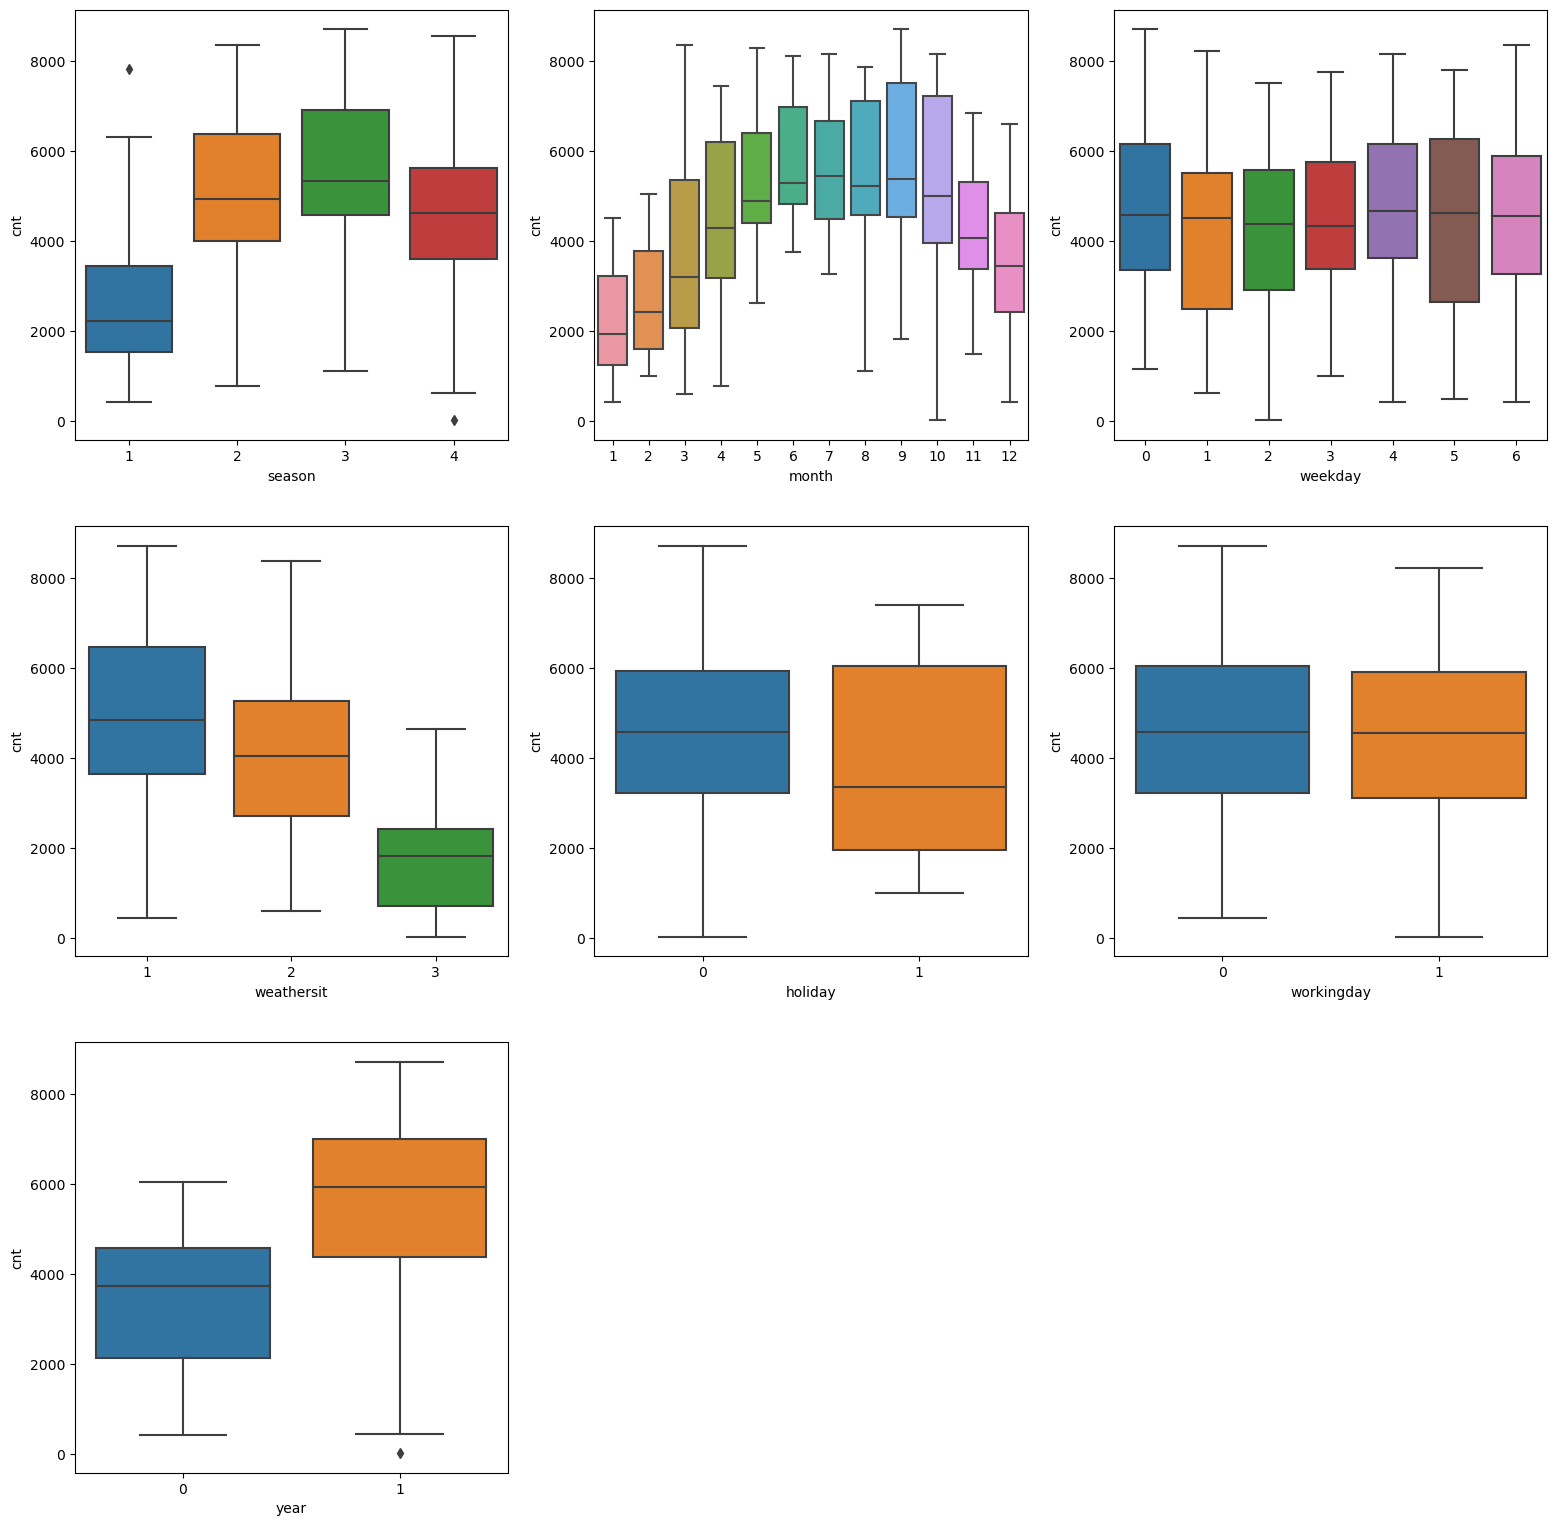

In [32]:
## Boxplot for checking How well varibles are good with Target 'CNT'
plt.figure(figsize=(19,19))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Eda_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = Eda_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Eda_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Eda_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Eda_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Eda_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = Eda_df)
plt.show()

## Step 5) Data Preprocessing

### 5.1) Dummies creation

In [33]:
Eda_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
## Creation of Dummies
Data_Preprocessing = pd.get_dummies(data=Eda_df,columns=["weathersit"],drop_first=True)
Data_Preprocessing = pd.get_dummies(data=Eda_df,columns=["season","month",'weekday'],drop_first=True)

In [35]:
Data_Preprocessing = pd.get_dummies(Eda_df, drop_first=True)
Data_Preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

In [36]:
## Checkind data of updated data
Data_Preprocessing.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
## Checkind dtpes of updated data
Data_Preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

###  5.2) Normalised Continous Variables 

In [38]:
# Normalization function  ## In replace of MInMax scaler it can be used
def MinMaxScaler (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [39]:
## Normalised all continous series

Data_Preprocessing['temp'] = MinMaxScaler(Data_Preprocessing.temp)
Data_Preprocessing['atemp'] = MinMaxScaler(Data_Preprocessing.atemp)
Data_Preprocessing['humidity'] = MinMaxScaler(Data_Preprocessing.humidity)
Data_Preprocessing['windspeed'] = MinMaxScaler(Data_Preprocessing.windspeed)
Data_Preprocessing['cnt'] = MinMaxScaler(Data_Preprocessing.cnt)

Data_Preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   humidity      730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    float64
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  month_2       730 non-null    uint8  
 12  month_3       730 non-null    uint8  
 13  month_4       730 non-null    uint8  
 14  month_5       730 non-null    uint8  
 15  month_6       730 non-null    uint8  
 16  month_7       730 non-null    uint8  
 17  month_8       730 non-null    uint8  
 18  month_9       730 non-null    

## Step 6) Train-Test Split 

In [40]:
## Spilting into X and Y
y = Data_Preprocessing.pop('cnt')
x= Data_Preprocessing

In [41]:
# Checking y values
y.head()

0    0.110792
1    0.089623
2    0.152669
3    0.177174
4    0.181546
Name: cnt, dtype: float64

In [42]:
# Checking x values
x.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
## Spliting into 70:30 Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
# Checking Shape of Split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


## Step 7) Linear Model building with Recursive feature elimination (RFE-Approch)

In [45]:
## Model building for Rfe
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [46]:
## Rfe model building
Recursive_feature_elimination = RFE(linear_model, n_features_to_select=15)
Recursive_feature_elimination.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [47]:
# Features distrution by rfe
list(zip(x_train.columns,Recursive_feature_elimination.support_,Recursive_feature_elimination.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 8),
 ('month_3', False, 2),
 ('month_4', False, 15),
 ('month_5', False, 4),
 ('month_6', False, 9),
 ('month_7', True, 1),
 ('month_8', False, 12),
 ('month_9', True, 1),
 ('month_10', False, 3),
 ('month_11', True, 1),
 ('month_12', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 6),
 ('weekday_4', False, 14),
 ('weekday_5', False, 13),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [48]:
## Features which support the target
support = x_train.columns[Recursive_feature_elimination.support_]
print(support)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_7', 'month_9', 'month_11', 'month_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [49]:
## Rejected Columns
x_train.columns[~Recursive_feature_elimination.support_]

Index(['workingday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_8', 'month_10', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [50]:
## RFE selected variables Dataframe
rfe_train_x = x_train[support]

In [51]:
## Variance Inflation Factor (VIF) Calcutaion (Manual Elimination)

def VIF_analysis(Reading_df):
    factor = pd.DataFrame()
    factor['Features'] = rfe_train_x.columns
    factor['VIF'] = [variance_inflation_factor(rfe_train_x.values, i) for i in range(rfe_train_x.shape[1])]
    factor['VIF'] = round(factor['VIF'], 2)
    factor = factor.sort_values(by = "VIF", ascending = False)
    return factor

In [52]:
# calculate VIF
VIF_analysis(rfe_train_x)

,Features,VIF
3,atemp,1272.17
2,temp,1259.61
4,humidity,17.78
7,season_3,7.80
5,windspeed,4.93
6,season_2,4.14
8,season_4,4.10
13,weathersit_2,2.14
0,year,2.05
11,month_11,1.93


> Temp and Humidity among highest VIF score

## Step 8) Building Model

### First Model

In [53]:
## First Model

first = sm.add_constant(rfe_train_x)
first_model = sm.OLS(y_train,first).fit()
print(first_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.11e-185
Time:                        03:36:12   Log-Likelihood:                 508.90
No. Observations:                 511   AIC:                            -985.8
Df Residuals:                     495   BIC:                            -918.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2274      0.030      7.664   

> Will Try to improve model further by removing atemp due to high vif values

In [54]:
## Dropping Humidty
xtrain= (rfe_train_x.drop(['atemp'], axis = 1))

### Model-2

In [55]:
# Second linear regression model

Second = sm.add_constant(xtrain)
                         
second_Model = sm.OLS(y_train,Second).fit()
print(second_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          6.23e-186
Time:                        03:36:12   Log-Likelihood:                 507.84
No. Observations:                 511   AIC:                            -985.7
Df Residuals:                     496   BIC:                            -922.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2318      0.030      7.845   

In [56]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.97
3,humidity,16.39
6,season_3,7.74
4,windspeed,4.59
5,season_2,4.11
7,season_4,4.08
12,weathersit_2,2.10
0,year,2.05
10,month_11,1.93
8,month_7,1.85


> Will remove humidity for better humidity

### Thrid Regression Model

In [57]:
## Dropping Hummidity
humidity_remove = xtrain.drop(["humidity"], axis = 1)

In [58]:
# Third linear regression model

Third = sm.add_constant(humidity_remove)
                         
Third_Model = sm.OLS(y_train,Third).fit()
print(Third_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.31e-183
Time:                        03:36:12   Log-Likelihood:                 498.98
No. Observations:                 511   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -910.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1363      0.019      7.145   

In [59]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = humidity_remove.columns
vif['VIF'] = [variance_inflation_factor(humidity_remove.values, i) for i in range(humidity_remove.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.27
5,season_3,7.38
6,season_4,4.08
3,windspeed,4.02
4,season_2,4.01
0,year,2.04
9,month_11,1.88
7,month_7,1.83
11,weathersit_2,1.55
8,month_9,1.52


### Model4

In [60]:
# Removing season_3 
season_3_remove = humidity_remove.drop(["season_3"], axis = 1)

# Fourth linear regression model
Fourth = sm.add_constant(season_3_remove)
                         
Fourth_Model = sm.OLS(y_train,Fourth).fit()
print(Fourth_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.93e-178
Time:                        03:36:13   Log-Likelihood:                 484.54
No. Observations:                 511   AIC:                            -943.1
Df Residuals:                     498   BIC:                            -888.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1112      0.019      5.850   

In [61]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = season_3_remove.columns
vif['VIF'] = [variance_inflation_factor(season_3_remove.values, i) for i in range(season_3_remove.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,3.88
5,season_4,2.43
0,year,2.03
4,season_2,1.99
8,month_11,1.79
6,month_7,1.71
10,weathersit_2,1.55
7,month_9,1.37
9,month_12,1.29


### Model-5

In [62]:
# Removing season_7 due to high p-values 
season_7_remove = season_3_remove.drop(["month_9"], axis = 1)

# Fith linear regression model
Five= sm.add_constant(season_7_remove)
                         
Five_Model = sm.OLS(y_train,Five).fit()
print(Five_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          4.08e-174
Time:                        03:36:13   Log-Likelihood:                 471.52
No. Observations:                 511   AIC:                            -919.0
Df Residuals:                     499   BIC:                            -868.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1073      0.019      5.513   

In [63]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = season_7_remove.columns
vif['VIF'] = [variance_inflation_factor(season_7_remove.values, i) for i in range(season_7_remove.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.15
3,windspeed,3.85
5,season_4,2.43
0,year,2.03
4,season_2,1.78
7,month_11,1.77
6,month_7,1.55
9,weathersit_2,1.55
8,month_12,1.28
10,weathersit_3,1.10


### Model-6

In [64]:
# Removing month_7 due to high p-values 
month_7_remove = season_7_remove.drop(["month_7"], axis = 1)

# Six linear regression model
six= sm.add_constant(month_7_remove)
                         
six_Model = sm.OLS(y_train,six).fit()
print(six_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     214.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          6.97e-174
Time:                        03:36:13   Log-Likelihood:                 468.18
No. Observations:                 511   AIC:                            -914.4
Df Residuals:                     500   BIC:                            -867.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1140      0.019      5.875   

In [65]:
# calculate VIF
vif = pd.DataFrame()
vif['Features'] = month_7_remove.columns
vif['VIF'] = [variance_inflation_factor(month_7_remove.values, i) for i in range(month_7_remove.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.80
2,temp,3.79
5,season_4,2.29
0,year,2.03
6,month_11,1.77
4,season_2,1.57
8,weathersit_2,1.54
7,month_12,1.28
9,weathersit_3,1.10
1,holiday,1.03


> Vif is under 5
>> F-statistic:214.9 and pvalue 6.97e-174(which equal to zero) indications a signifcant model
>>> very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant

## Step 9: Residual Analysis

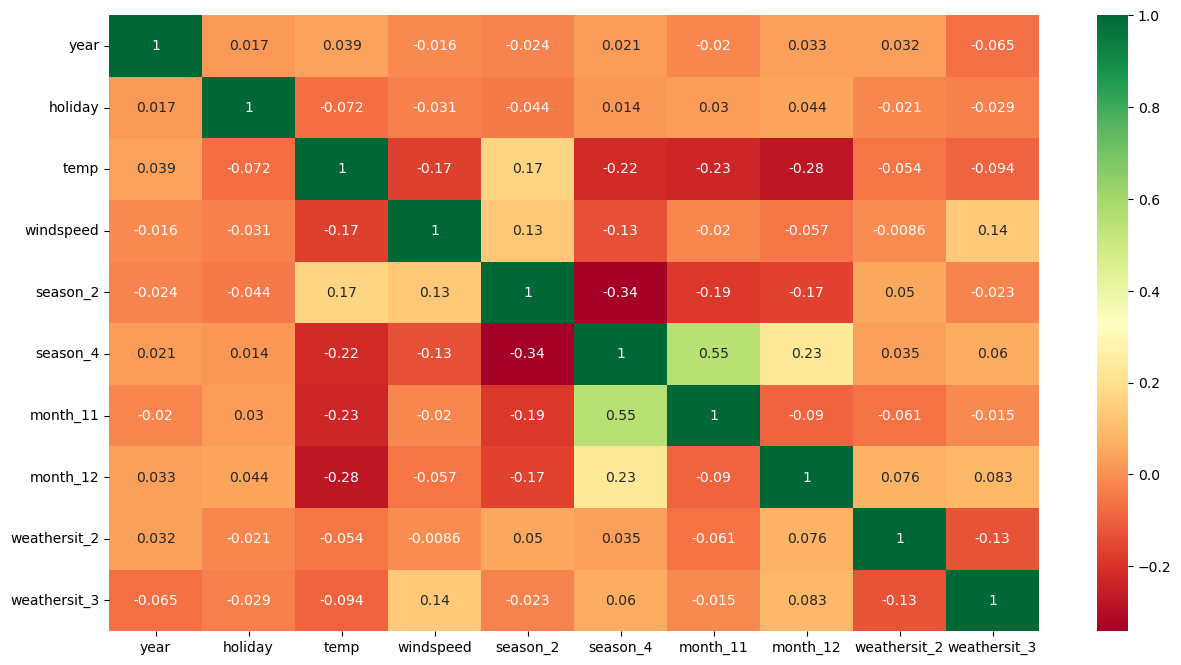

In [66]:
Residual_Analysis= month_7_remove.copy()

## Plotting Heatmap to check correlation
plt.figure(figsize=(15,8))
sns.heatmap(Residual_Analysis.corr(),annot = True, cmap="RdYlGn")
plt.show()

> no multicolinearity as vif score are less than 5

In [67]:
ytrain_pred = six_Model.predict(six)

### Normality of error terms

Text(0.5, 0, 'Errors')

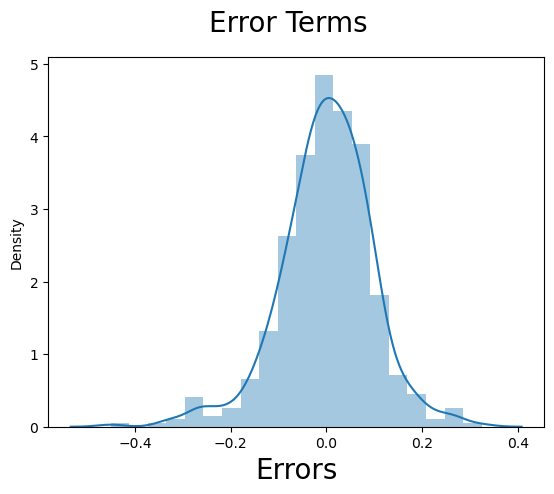

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - ytrain_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 20)

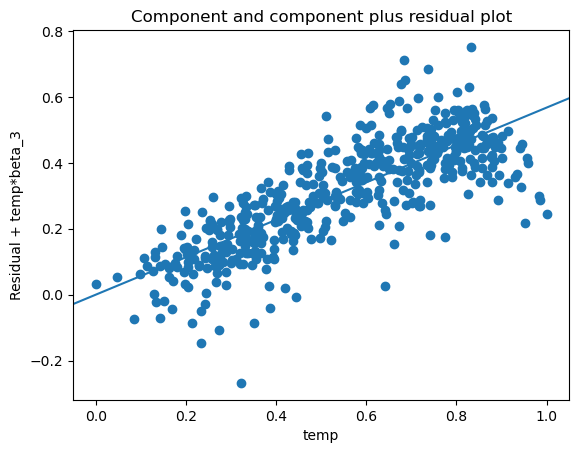

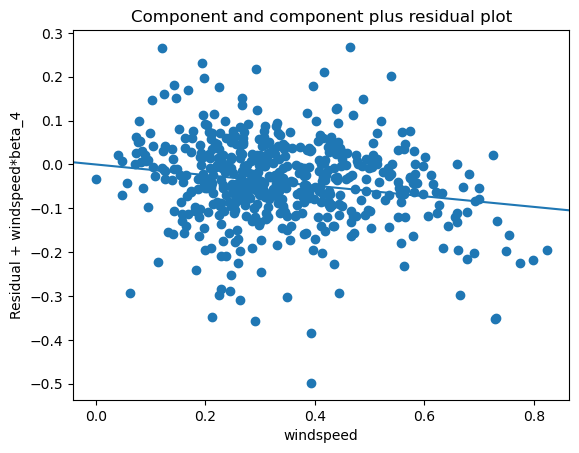

In [69]:
# Linear relationship validation using CCPR plot and Component and component plus residual plot

sm.graphics.plot_ccpr(six_Model, 'temp')
plt.show()

sm.graphics.plot_ccpr(six_Model, 'windspeed')
plt.show()

> Linearity can be observed.

### Homoscedasticity

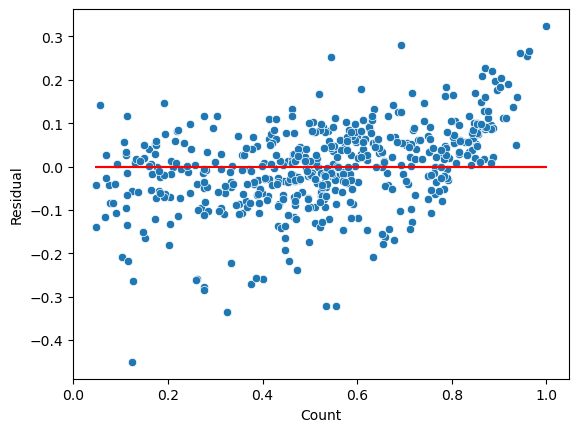

In [70]:
residual = y_train - ytrain_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

> No patterns are visible from the Graph

## Step 10: Final Model

In [71]:
x_test

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
468,1,0,0,0.543115,0.536771,0.517138,0.347424,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,1,0.758058,0.704203,0.841902,0.394883,1,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,1,0.324018,0.317998,0.641388,0.317944,0,0,1,...,0,0,0,1,0,0,0,0,0,0
355,0,0,0,0.453814,0.455552,0.778920,0.051298,0,0,0,...,0,1,0,0,0,0,0,1,1,0
515,1,0,1,0.773634,0.724915,0.506856,0.356416,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,0,1,0.497426,0.488701,0.854327,0.485909,0,0,1,...,1,0,0,0,0,1,0,0,1,0
532,1,0,1,0.664605,0.647005,0.615681,0.252566,1,0,0,...,0,0,1,0,0,0,0,0,0,0
558,1,0,0,0.838014,0.772963,0.499571,0.120515,0,1,0,...,0,0,0,0,0,0,0,1,1,0
137,0,0,1,0.611648,0.588177,0.894602,0.369225,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [72]:
col1 = Residual_Analysis.columns

X_test = x_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [73]:
y_pred = six_Model.predict(X_test_lm_6)

In [74]:
## Checking R2_scores
r2_scores = r2_score(y_test, y_pred)
round(r2_scores,3)

0.813

## Step 11- Evaluation of Model

In [75]:
## Checking parmas
round(six_Model.params,4)

const           0.1140
year            0.2296
holiday        -0.0824
temp            0.5674
windspeed      -0.1210
season_2        0.0763
season_4        0.1706
month_11       -0.0607
month_12       -0.0639
weathersit_2   -0.0755
weathersit_3   -0.2452
dtype: float64

Text(0.5, 0, 'y_test')

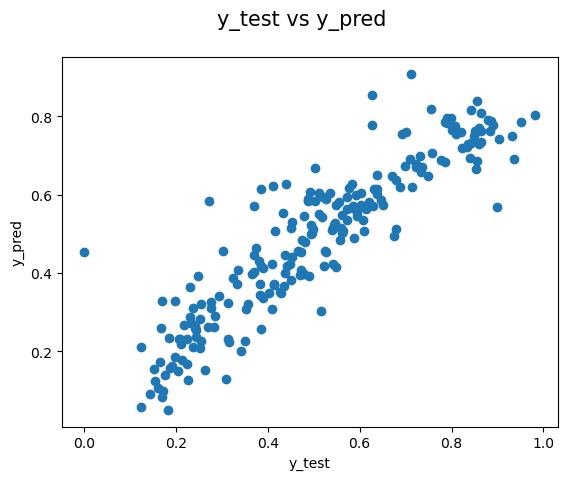

In [76]:
# Plotting graph to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 10) 
plt.xlabel('y_test', fontsize = 10)

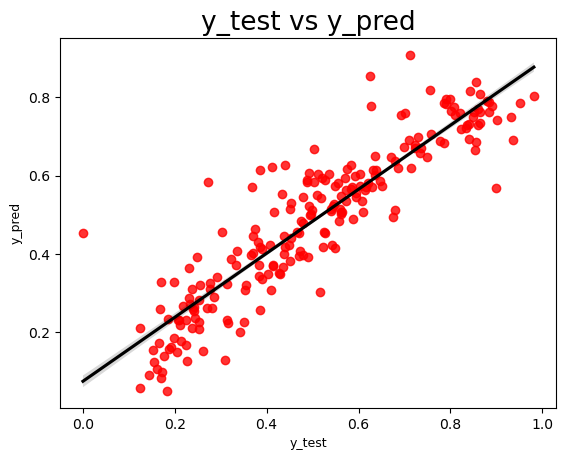

In [77]:
#  plotting and Visualizing a Regression plot fit on the test data 

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=60, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=19)
plt.xlabel('y_test', fontsize=9)
plt.ylabel('y_pred', fontsize=9)
plt.show()

## Adjusted R^2 Value for TEST

In [78]:
### R2scores of Train Data
r2_scores

0.8130258257178843

In [79]:
### Shape of test data
X_test.shape

(219, 10)

In [80]:
A = X_test.shape[0] # n is number of rows in X
B = X_test.shape[1] # Number of features (predictors, B) is the shape along axis 1

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2_scores)*(A-1)/(A-B-1)
adjusted_r2

0.8040366827235518

## Final Results

> Temperature (temp), Year(September) and Weather Situation 3 (weathersit_3) are the varibles which directly had relation with bike sales
